In [1]:
from __future__ import print_function, division
%run ../basics.ipynb

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show_config']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

Using Theano backend.


In [2]:
df = pd.read_csv('../data/learning_resources.csv')
display(df.head(2))
tags = pd.read_csv('../data/tags.csv')

display(tags.head(2))
df['tags'] = df['id'].apply(lambda x: (' '.join(tags[tags['id'] == x]['concept_tag'].values.tolist())).strip())
print(pd.unique(df['venue']))
edx_idx = df['venue'] == 'edX'
tags = pd.read_csv('../data/edX Tag Assignment - FG validation%2Fassignments.csv')
df['tags'].loc[edx_idx] = df['id'].loc[edx_idx].apply(lambda x: (' '.join(tags[tags['id'] == x]['tag'].values.tolist())).strip())
#df = df[df['venue'] != 'Videolectures.net']
print(df.columns)
print(df.count()/len(df)*100)
df.head(2)

id                      title                                  subtitle  \
0  cs101  Intro to Computer Science  Build a Search Engine & a Social Network   
1  ud257                A/B Testing     Online Experiment Design and Analysis   

                                         description  \
0  In this introduction to computer programming c...   
1  This course will cover the design and analysis...   

                                   short_description  \
0  Learn key computer science concepts in this in...   
1  This course will cover the design and analysis...   

                                            syllabus  \
0  ###Lesson 1: How to Get Started\n\n- Interview...   
1  ### Lesson 1: Overview of A/B Testing\nThis le...   

                                                 url  \
0  https://www.udacity.com/course/intro-to-comput...   
1  https://www.udacity.com/course/ab-testing--ud2...   

                               slug    difficulty created   ...     available  \
0  intro-to-computer-science--cs101      beginner     NaN   ...           NaN   
1                 ab-testing--ud257  intermediate     NaN   ...           NaN   

  end_date typical_learning_time  rating price new language  format  \
0      NaN               3months     NaN  Free NaN       en    MOOC   
1      NaN               1months     NaN  Free NaN       en    MOOC   

                                             license    venue  
0  Creative Commons Attribution-NonCommercial- No...  Udacity  
1  Creative Commons Attribution-NonCommercial- No...  Udacity  

[2 rows x 22 columns]

id          shortname    concept_tag  \
0  ud257  ab-testing--ud257  video_lecture   
1  ud257  ab-testing--ud257       in_depth   

                                                 url  
0  https://www.udacity.com/course/ab-testing--ud2...  
1  https://www.udacity.com/course/ab-testing--ud2...

['Udacity' 'Coursera' 'Videolectures.net' 'edX']
Index([u'id', u'title', u'subtitle', u'description', u'short_description',
       u'syllabus', u'url', u'slug', u'difficulty', u'created',
       u'date_modified', u'date_published', u'available', u'end_date',
       u'typical_learning_time', u'rating', u'price', u'new', u'language',
       u'format', u'license', u'venue', u'tags'],
      dtype='object')
id                       100.000000
title                     99.781659
subtitle                  25.545852
description               85.152838
short_description          3.711790
syllabus                  10.043668
url                      100.000000
slug                     100.000000
difficulty                24.235808
created                   44.978166
date_modified              0.000000
date_published            44.978166
available                 44.978166
end_date                   0.000000
typical_learning_time     44.104803
rating                    17.685590
price             

id                      title                                  subtitle  \
0  cs101  Intro to Computer Science  Build a Search Engine & a Social Network   
1  ud257                A/B Testing     Online Experiment Design and Analysis   

                                         description  \
0  In this introduction to computer programming c...   
1  This course will cover the design and analysis...   

                                   short_description  \
0  Learn key computer science concepts in this in...   
1  This course will cover the design and analysis...   

                                            syllabus  \
0  ###Lesson 1: How to Get Started\n\n- Interview...   
1  ### Lesson 1: Overview of A/B Testing\nThis le...   

                                                 url  \
0  https://www.udacity.com/course/intro-to-comput...   
1  https://www.udacity.com/course/ab-testing--ud2...   

                               slug    difficulty created  \
0  intro-to-computer-science--cs101      beginner     NaN   
1                 ab-testing--ud257  intermediate     NaN   

                         ...                          end_date  \
0                        ...                               NaN   
1                        ...                               NaN   

  typical_learning_time rating  price new language format  \
0               3months    NaN   Free NaN       en   MOOC   
1               1months    NaN   Free NaN       en   MOOC   

                                             license    venue  \
0  Creative Commons Attribution-NonCommercial- No...  Udacity   
1  Creative Commons Attribution-NonCommercial- No...  Udacity   

                                                tags  
0  video_lecture project overview computer_scienc...  
1  video_lecture in_depth project data_collection...  

[2 rows x 23 columns]

In [3]:
class CLF(object):
    def __init__(self, n_topics=20, tfidf_max_df=None, tfidf_min_df=None, tag_vec_max_df=None, tag_vec_min_df=None, 
                 ngram_range=None, nmf=True, **kwargs):
        self.n_topics = n_topics
        self.vectorizer = TfidfVectorizer(stop_words='english',
                                          max_df=0.6 if tfidf_max_df is None else tfidf_max_df,
                                          min_df=5 if tfidf_min_df is None else tfidf_min_df,
                                          ngram_range=(1 ,3) if ngram_range is None else ngram_range)
        
        self.tag_vectorizer = CountVectorizer(max_df=.3 if tag_vec_max_df is None else tag_vec_max_df,
                                              min_df=0 if tag_vec_min_df is None else tag_vec_min_df)
        
        self.nmf = NMF(n_components=n_topics, random_state=2016) if nmf else None
        self.clf = None
        self.topic_dict = None
        self.kwargs = kwargs

    def fit(self, X, y, viz=True, *args, **kwargs):
        orig_X = X.copy()
        X = self.prepare_X(X)
        X = self.vectorize_X(X, fit=True, viz=viz)
        if viz:
            try:
                tsne_plot(X, orig_X[[orig_X.columns[0]]], fit=True)
            except:
                print(traceback.format_exc())
        y = self.vectorize_y(y, fit=True)
        self.clf = OneVsRestClassifier(KNeighborsClassifier(**self.kwargs))
        # self.clf = OneVsRestClassifier(LogisticRegression())
        filt = np.array(y.sum(axis=1) > 0).flatten() # don't train on untagged resources
        if sum(filt) != y.shape[0]:
            print('excluding untagged resources for clf training')
            print(y.shape)
            print(filt.shape)
            print(y.shape[0], end=' -> ')
            y = y[filt, :]
            X = X[filt, :]
            print(y.shape[0])
        self.clf.fit(X, y, *args, **kwargs)
        
    def predict(self, X):
        X = self.prepare_X(X)
        X = self.vectorize_X(X, fit=False)
        return self.clf.predict_proba(X)
    
    @staticmethod
    def prepare_X(X):
        if isinstance(X, pd.DataFrame):
            concat_x = pd.Series(index=X.index, data='')
            for i in X.columns:
                concat_x += ' ' + X[i].apply(text_cleanup)
            X = concat_x
        else:
            assert isinstance(X, pd.Series)
        return X
        
    def vectorize_X(self, X, fit=False, viz=False):
        if fit:
            tfidf = self.vectorizer.fit_transform(X.values)
        else:
            tfidf = self.vectorizer.transform(X.values)
        tfidf, words = filter_word_rep(tfidf, self.vectorizer.get_feature_names())
        print('tfidf shape', tfidf.shape)
        # tfidf = (tfidf > 0.).astype('float')
        if self.nmf is not None:
            if fit:
                nmf = self.nmf.fit_transform(tfidf)
                feature_names = words
                n_top_words = 50
                self.topic_dict = dict()
                for topic_idx, topic in enumerate(self.nmf.components_):
                    topic_top_words = [feature_names[i]
                                    for i in topic.argsort()[:-n_top_words - 1:-1]]
                    topic_top_words_vals = sorted(topic.ravel(), reverse=True)[:n_top_words]
                    text_freq = zip(topic_top_words, topic_top_words_vals)
                    if viz:
                        print("v v v v \tTopic #%d\t" % topic_idx, end='v v v v v')
                        wordcloud(text_freq)
                    topic_top_words = ", ".join(topic_top_words)
                    #print(topic_top_words)
                    self.topic_dict[topic_idx] = text_freq
                if viz:
                    viz_nmf_output(nmf)
            else:
                nmf = self.nmf.transform(tfidf)
            print('nmf shape:', nmf.shape)
            return nmf
        else:
            return tfidf.todense()
    
    def plot_word_and_tag_clouds(self, X, y, fit=False, th=0, viz=False):
        X = self.prepare_X(X)
        X = self.vectorize_X(X, fit=fit, viz=viz)
        y = self.vectorize_y(y, fit=fit)
        topic_tags = defaultdict(lambda: np.zeros(y.shape[1]))
        for x_s, y_s in tqdm(zip(X, y)):
            x_s = np.array(x_s).flatten()
            y_s = np.array(y_s).flatten()
            for i, x_i in enumerate(x_s):
                if x_i >= th:
                    topic_tags[i] += (x_i * y_s)
        topic_freq = {key: zip(self.get_tag_names(), val) for key, val in topic_tags.items()}
        for key, text_freq in self.topic_dict.items():
            print('-' * 80)
            wordcloud(text_freq)
            wordcloud(topic_freq[key])
    
    def vectorize_y(self, y, fit=False):
        if fit:
            y = y.fillna(' ')
            y = self.tag_vectorizer.fit_transform(y.values)
            if self.tag_vectorizer.stop_words_:
                print('ignored tags:')
                print(' ,'.join(self.tag_vectorizer.stop_words_))
            print('considered tags: (tag, resources tagged in %)')
            print(' ,'.join(map(str, sorted(zip(self.tag_vectorizer.get_feature_names(), 
                              np.array(y.sum(axis=0)).flatten()/y.shape[0]*100, 
                              np.array(y.sum(axis=0)).flatten()), key=itemgetter(1), reverse=True))))
        else:
            y = self.tag_vectorizer.transform(y.values)
        y = (y > 0).astype('float').todense()
        print('y shape', y.shape)
        return y
    
    def get_tag_names(self):
        return self.tag_vectorizer.get_feature_names()

# resources: 458
tagged resources: 456
tfidf shape (458, 2426)
v v v v 	Topic #0	v v v v v

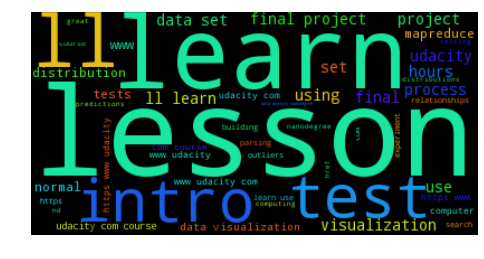

v v v v 	Topic #1	v v v v v

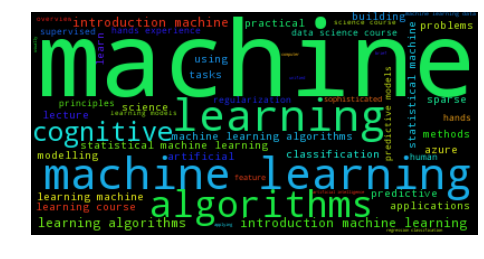

v v v v 	Topic #2	v v v v v

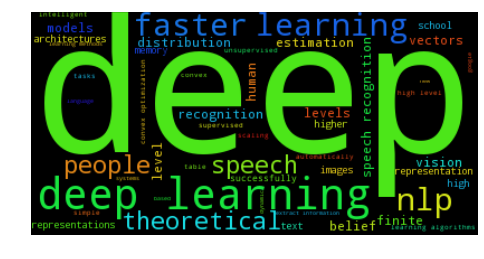

v v v v 	Topic #3	v v v v v

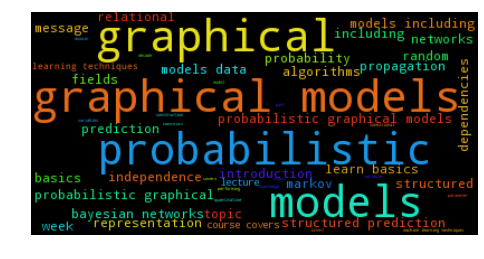

v v v v 	Topic #4	v v v v v

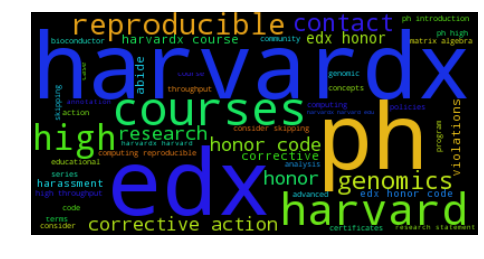

v v v v 	Topic #5	v v v v v

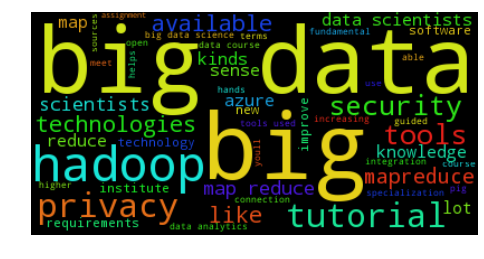

v v v v 	Topic #6	v v v v v

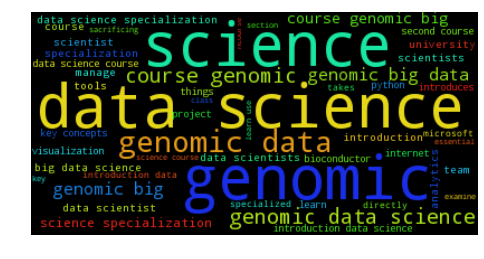

v v v v 	Topic #7	v v v v v

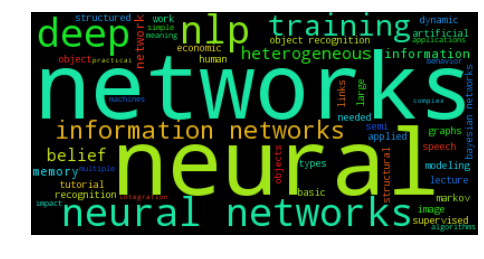

v v v v 	Topic #8	v v v v v

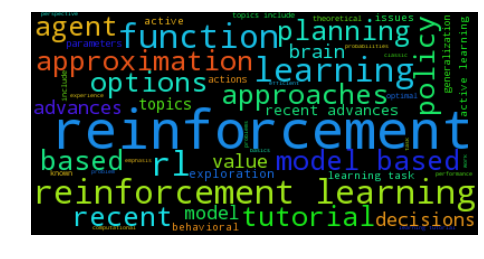

v v v v 	Topic #9	v v v v v

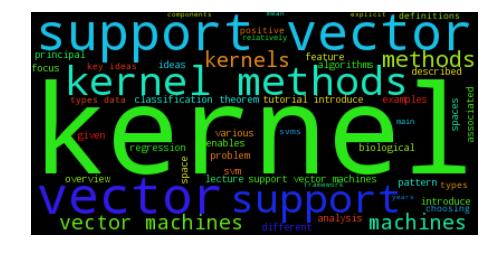

v v v v 	Topic #10	v v v v v

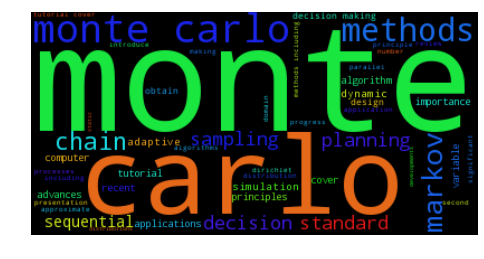

v v v v 	Topic #11	v v v v v

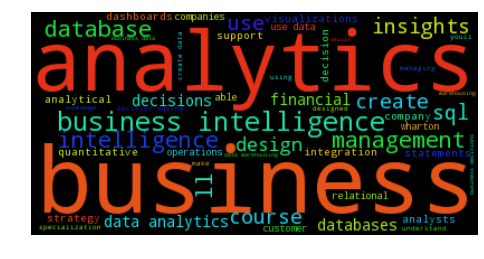

v v v v 	Topic #12	v v v v v

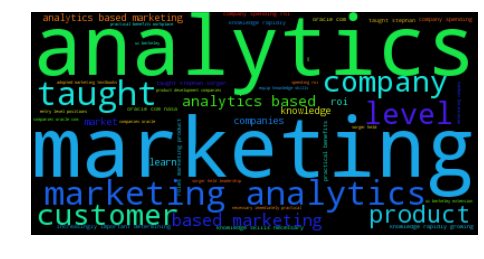

v v v v 	Topic #13	v v v v v

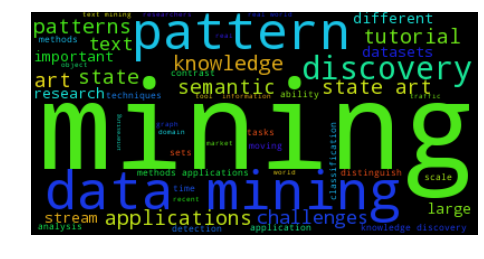

v v v v 	Topic #14	v v v v v

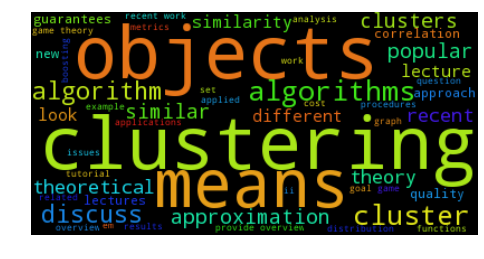

v v v v 	Topic #15	v v v v v

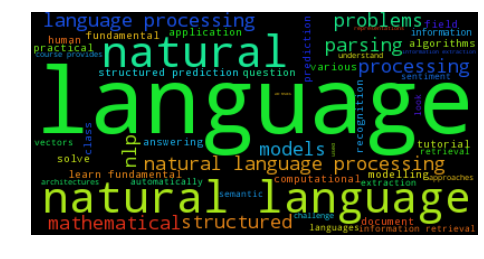

v v v v 	Topic #16	v v v v v

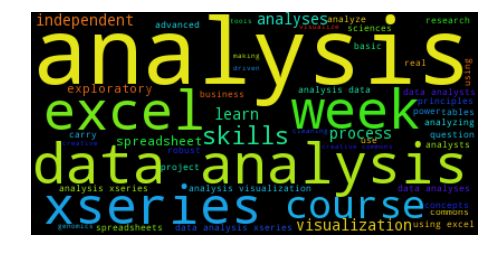

v v v v 	Topic #17	v v v v v

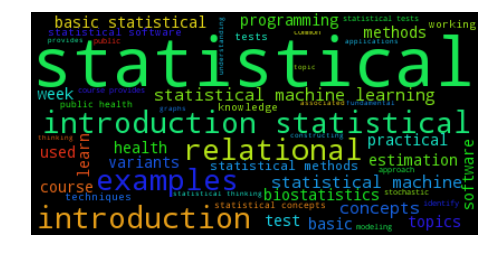

v v v v 	Topic #18	v v v v v

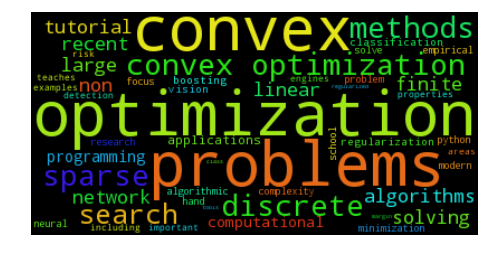

v v v v 	Topic #19	v v v v v

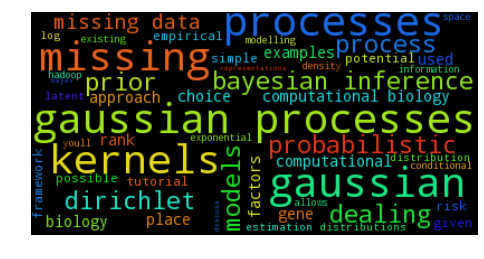

v v v v 	Topic #20	v v v v v

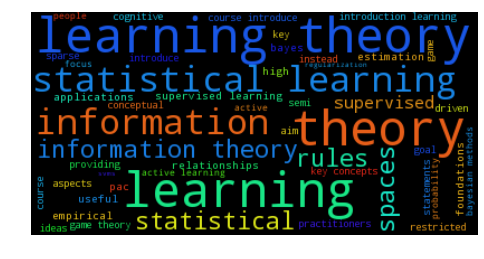

v v v v 	Topic #21	v v v v v

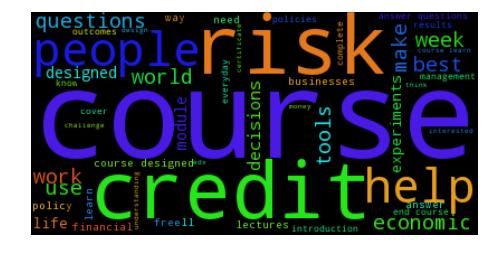

v v v v 	Topic #22	v v v v v

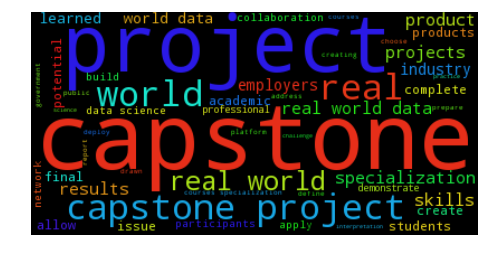

v v v v 	Topic #23	v v v v v

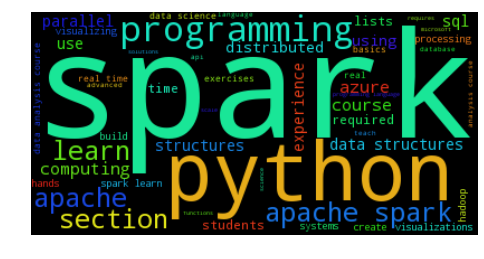

v v v v 	Topic #24	v v v v v

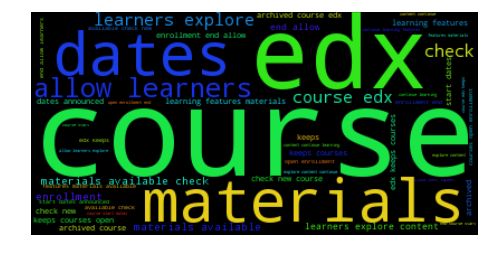

v v v v 	Topic #25	v v v v v

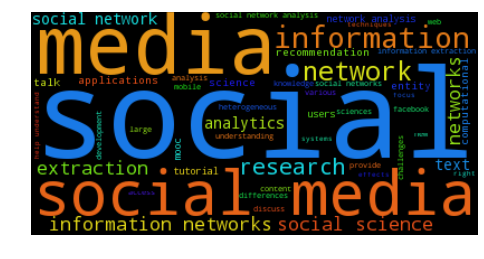

v v v v 	Topic #26	v v v v v

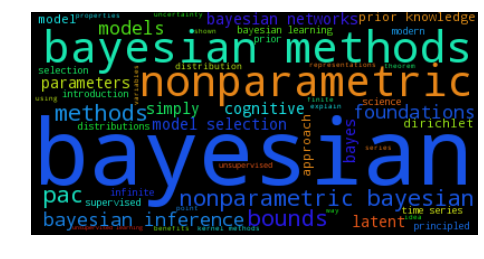

v v v v 	Topic #27	v v v v v

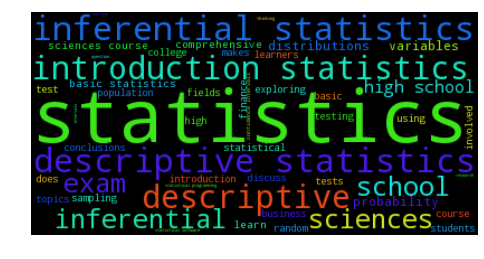

v v v v 	Topic #28	v v v v v

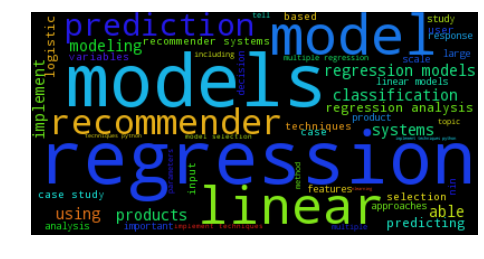

v v v v 	Topic #29	v v v v v

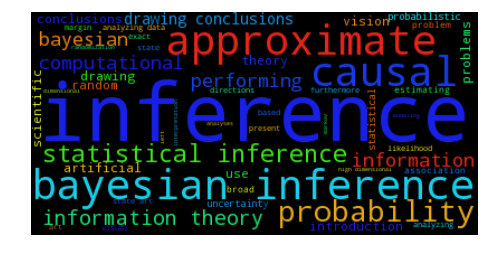

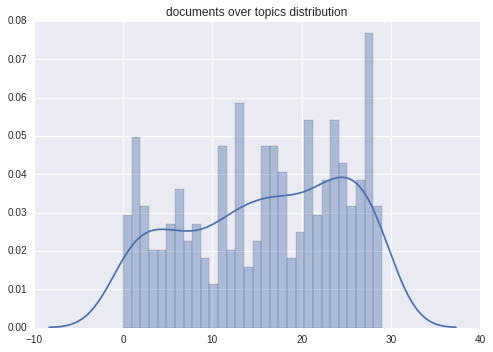

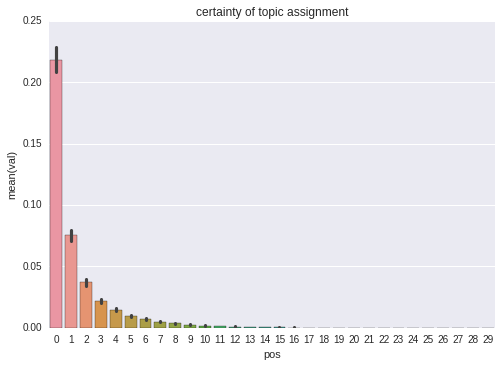

nmf shape: (458, 30)
458


ignored tags:
classification ,programming_tool ,graph_database ,ensemble_learning ,topic_model ,image_data ,information_retrieval ,fmri ,mooc ,gis ,nosql ,dimensionality_reduction ,streaming_data ,html ,galaxy ,mobile_devices ,mathematics ,xml ,javascript ,supervised_learning ,video_lecture ,machine_learning ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,security ,physics ,history
considered tags: (tag, resources tagged in %)
(u'in_depth', 28.384279475982531, 130) ,(u'overview', 21.397379912663755, 98) ,(u'probability_statistics', 19.213973799126638, 88) ,(u'business_analytics', 12.663755458515283, 58) ,(u'unsupervised_learning', 11.790393013100436, 54) ,(u'project', 10.480349344978166, 48) ,(u'data_visualization', 8.7336244541484707, 40) ,(u'reinforcement_learning', 8.7336244541484707, 40) ,(u'case_study', 7.4235807860262017, 34) ,(u'neural_networks', 6.9868995633187767, 32) ,(u'python', 6.5502183406113534, 30) ,(u'big_data',

In [4]:
clf = CLF(n_topics=30, tag_vec_min_df=5, nmf=True,
          n_neighbors=3)
print('# resources:', len(df))
print('tagged resources:', (df['tags'].apply(len) > 0).sum())
clf.fit(df[['title', 'subtitle', 'description', 'syllabus']], df['tags'], 
        viz=True)
#clf.plot_word_and_tag_clouds(df[['title', 'subtitle', 'description', 'syllabus']], df['tags'])

In [5]:
y_pred = clf.predict(df[['title', 'subtitle', 'description', 'syllabus']])

tfidf shape (458, 2426)
nmf shape: (458, 30)


In [6]:
pos_th = 0.5
neg_th = 0.5
tags_rec = True
tags_rev = False
recs = list()
revs = list()
y_true = clf.vectorize_y(df['tags'])
tags = np.array(clf.get_tag_names())

print(classification_report(y_true, y_pred > .5, target_names=tags))

for idx, title in enumerate(df['title']):
    y_pred_row = np.array(y_pred[idx, :]).flatten()
    y_true_row = np.array(y_true[idx, :]).flatten()
    recommended_tags = (y_pred_row >= pos_th) & (y_true_row < 0.5)
    recommended_tags = zip(tags[recommended_tags], y_pred_row[recommended_tags])
    
    revise_tags = (y_pred_row <= neg_th) & (y_true_row > 0.5)
    revise_tags = zip(tags[revise_tags], y_pred_row[revise_tags])
    
    if (len(recommended_tags) > 0 and tags_rec) or (len(revise_tags) > 0 and tags_rev):
        print(title)
        df_entry = df.iloc[idx]
        c_id, c_url = df_entry['id'], df_entry['url']
        print(c_id, c_url)
        if len(recommended_tags) > 0 and tags_rec:
            print('  recommended tags:')
            for i, p in sorted(recommended_tags, key=itemgetter(1), reverse=True):
                print('\t', i, '(%.2f' % (p * 100), '% )')
                recs.append((c_id, i, p * 100))
        if len(revise_tags) > 0 and tags_rev:
            print('  revise tags:')
            for i, p in sorted(revise_tags, key=itemgetter(1)):
                print('\t', i, '(%.2f' % ((1. - p) * 100), '% )')
                revs.append((c_id, i, (1. - p) * 100))
        print('-' * 80)

y shape (458, 47)
                               precision    recall  f1-score   support

      artificial_intelligence       0.00      0.00      0.00         7
                         bd2k       1.00      0.89      0.94         9
                     big_data       0.62      0.37      0.47        27
                      biology       0.00      0.00      0.00         5
           business_analytics       0.95      0.67      0.79        58
                   case_study       0.71      0.29      0.42        34
                   clustering       0.60      0.43      0.50         7
             computer_science       0.00      0.00      0.00         8
                data_cleaning       1.00      0.14      0.25         7
              data_collection       0.88      0.30      0.45        23
             data_integration       0.62      0.29      0.40        17
         data_science_process       0.83      0.53      0.65        19
           data_visualization       0.76      0.47      0.

In [7]:
rec_df = pd.DataFrame(columns=['id', 'tag', 'probability'], data=recs)
rec_df.to_csv('tag_recommendations.csv', encoding='utf-8', index=False, quoting=QUOTE_ALL)

In [8]:
rev_df = pd.DataFrame(columns=['id', 'tag', 'probability'], data=revs)
rev_df.to_csv('tag_revision.csv', encoding='utf-8', index=False, quoting=QUOTE_ALL)

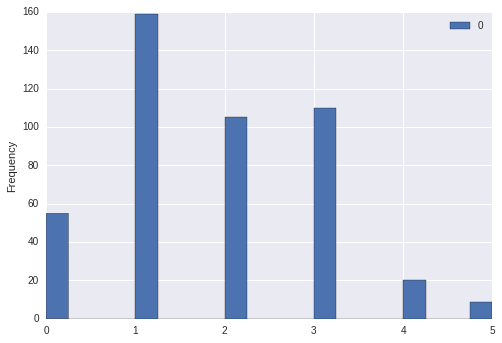

In [9]:
pd.DataFrame((y_pred > 0.5).sum(axis=1)).plot(kind='hist', bins=20)

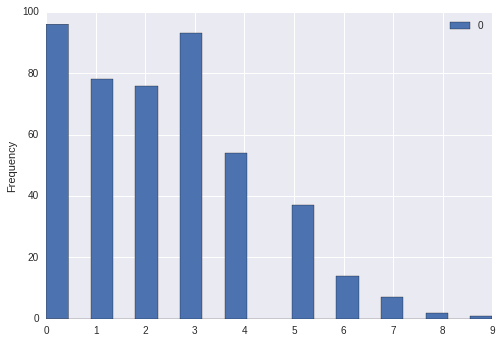

In [10]:
pd.DataFrame((y_true > 0.5).sum(axis=1)).plot(kind='hist', bins=20)

In [11]:
#%run ../basics.ipynb
print('# resources:', len(df))
print('tagged resources:', (df['tags'].apply(len) > 0).sum())
tag_idx = df[df['tags'].apply(len) > 0].index
all_idx = set(df.index)
all_y_pred = list()
all_y_true = list()
tag_names = list()
n_folds = 10

for train_idx, test_idx in tqdm(KFold(len(tag_idx), n_folds=n_folds), total=n_folds):
    test_idx = tag_idx[test_idx]
    train_idx = list(all_idx - set(test_idx))
    train_df = df.loc[train_idx].copy()
    test_df = df.loc[test_idx].copy()
    clf = CLF(n_topics=30, tag_vec_min_df=5, tag_vec_max_df=1., nmf=True, 
              n_neighbors=3)
    clf.fit(train_df[['title', 'subtitle', 'description', 'syllabus']], 
            train_df['tags'], 
            viz=False)
    y_pred = clf.predict(test_df[['title', 'subtitle', 'description', 'syllabus']])
    y_true = clf.vectorize_y(test_df['tags'])
    # print('hamming loss:', hamming_loss(y_true, y_pred))
    all_y_pred.append(y_pred)
    all_y_true.append(y_true)
    tag_names.append(clf.get_tag_names())

  0%|          | 0/10 [00:00<?, ?it/s]

# resources: 458
tagged resources: 456
tfidf shape (412, 2196)
nmf shape: (412, 30)
ignored tags:
graph_data ,classification ,programming_tool ,graph_database ,ensemble_learning ,topic_model ,galaxy ,fmri ,gis ,information_retrieval ,dimensionality_reduction ,mobile_devices ,streaming_data ,javascript ,supervised_learning ,mathematics ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,security ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 48.05825242718447, 198) ,(u'video_lecture', 47.815533980582522, 197) ,(u'machine_learning', 34.466019417475728, 142) ,(u'in_depth', 25.970873786407765, 107) ,(u'overview', 18.932038834951456, 78) ,(u'probability_statistics', 17.233009708737864, 71) ,(u'unsupervised_learning', 12.864077669902912, 53) ,(u'business_analytics', 12.378640776699029, 51) ,(u'reinforcement_learning', 9.4660194174757279, 39) ,(u'case_study', 7.7669902912621351, 32) ,(u'data_visualization', 7.28

 10%|█         | 1/10 [00:02<00:23,  2.66s/it]

tfidf shape (46, 2196)
nmf shape: (46, 30)
y shape (46, 49)
tfidf shape (412, 2275)
nmf shape: (412, 30)
ignored tags:
nosql ,programming_tool ,ensemble_learning ,topic_model ,image_data ,regression ,fmri ,gis ,information_retrieval ,dimensionality_reduction ,html ,mobile_devices ,mathematics ,xml ,javascript ,supervised_learning ,streaming_data ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,databases ,security ,physics
considered tags: (tag, resources tagged in %)
(u'mooc', 48.05825242718447, 198) ,(u'video_lecture', 47.815533980582522, 197) ,(u'machine_learning', 34.466019417475728, 142) ,(u'in_depth', 25.242718446601941, 104) ,(u'overview', 20.631067961165048, 85) ,(u'probability_statistics', 19.174757281553397, 79) ,(u'unsupervised_learning', 12.621359223300971, 52) ,(u'business_analytics', 11.407766990291263, 47) ,(u'reinforcement_learning', 9.7087378640776691, 40) ,(u'project', 9.4660194174757279, 39) ,(u'neural_networks

 20%|██        | 2/10 [00:04<00:20,  2.55s/it]

y shape (46, 48)
tfidf shape (412, 2243)
nmf shape: (412, 30)
ignored tags:
nosql ,programming_tool ,graph_database ,ensemble_learning ,engineering ,image_data ,galaxy ,xml ,classification ,dimensionality_reduction ,html ,mobile_devices ,mathematics ,biology ,javascript ,supervised_learning ,streaming_data ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,security ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 48.05825242718447, 198) ,(u'video_lecture', 48.05825242718447, 198) ,(u'machine_learning', 33.980582524271846, 140) ,(u'in_depth', 25.242718446601941, 104) ,(u'overview', 20.388349514563107, 84) ,(u'probability_statistics', 17.961165048543691, 74) ,(u'unsupervised_learning', 13.106796116504855, 54) ,(u'business_analytics', 11.165048543689322, 46) ,(u'reinforcement_learning', 9.7087378640776691, 40) ,(u'data_visualization', 8.7378640776699026, 36) ,(u'project', 8.2524271844660202, 34) ,(u'neural_networks', 

 30%|███       | 3/10 [00:06<00:15,  2.26s/it]

y shape (46, 48)
tfidf shape (412, 2314)
nmf shape: (412, 30)
ignored tags:
nosql ,graph_database ,ensemble_learning ,topic_model ,image_data ,information_retrieval ,fmri ,gis ,classification ,dimensionality_reduction ,html ,galaxy ,mobile_devices ,mathematics ,xml ,javascript ,supervised_learning ,streaming_data ,ethics ,sensor_networks_iot ,linear_algebra ,recommender_system ,optimization ,security ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 56.310679611650485, 232) ,(u'video_lecture', 56.067961165048544, 231) ,(u'machine_learning', 30.825242718446599, 127) ,(u'in_depth', 29.126213592233007, 120) ,(u'overview', 23.300970873786408, 96) ,(u'probability_statistics', 20.145631067961165, 83) ,(u'business_analytics', 13.106796116504855, 54) ,(u'project', 11.407766990291263, 47) ,(u'unsupervised_learning', 11.407766990291263, 47) ,(u'data_visualization', 9.4660194174757279, 39) ,(u'reinforcement_learning', 8.2524271844660202, 34) ,(u'case_study', 8.009708737864

 40%|████      | 4/10 [00:09<00:14,  2.36s/it]

tfidf shape (46, 2314)
nmf shape: (46, 30)
y shape (46, 50)
tfidf shape (412, 2284)
nmf shape: (412, 30)
ignored tags:
nosql ,programming_tool ,graph_database ,ensemble_learning ,engineering ,topic_model ,image_data ,information_retrieval ,fmri ,gis ,classification ,dimensionality_reduction ,html ,galaxy ,mobile_devices ,mathematics ,artificial_intelligence ,xml ,biology ,javascript ,streaming_data ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,security ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 59.22330097087378, 244) ,(u'video_lecture', 58.980582524271838, 243) ,(u'in_depth', 31.55339805825243, 130) ,(u'machine_learning', 29.854368932038831, 123) ,(u'overview', 23.78640776699029, 98) ,(u'probability_statistics', 20.873786407766989, 86) ,(u'business_analytics', 14.077669902912621, 58) ,(u'project', 11.650485436893204, 48) ,(u'data_visualization', 9.7087378640776691, 40) ,(u'unsupervised_learning

 50%|█████     | 5/10 [00:10<00:10,  2.20s/it]

tfidf shape (46, 2284)
nmf shape: (46, 30)
y shape (46, 47)
tfidf shape (412, 2322)
nmf shape: (412, 30)
ignored tags:
nosql ,programming_tool ,graph_database ,ensemble_learning ,topic_model ,image_data ,information_retrieval ,fmri ,gis ,classification ,dimensionality_reduction ,html ,galaxy ,mobile_devices ,mathematics ,xml ,javascript ,supervised_learning ,streaming_data ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 59.22330097087378, 244) ,(u'video_lecture', 58.980582524271838, 243) ,(u'in_depth', 31.55339805825243, 130) ,(u'machine_learning', 29.854368932038831, 123) ,(u'overview', 23.78640776699029, 98) ,(u'probability_statistics', 20.873786407766989, 86) ,(u'business_analytics', 14.077669902912621, 58) ,(u'project', 11.650485436893204, 48) ,(u'unsupervised_learning', 10.194174757281553, 42) ,(u'data_visualization', 9.7087378640776691, 40) ,(u'case_

 60%|██████    | 6/10 [00:12<00:08,  2.08s/it]

y shape (46, 50)
tfidf shape (413, 2305)
nmf shape: (413, 30)
ignored tags:
nosql ,programming_tool ,graph_database ,ensemble_learning ,topic_model ,image_data ,information_retrieval ,fmri ,gis ,classification ,dimensionality_reduction ,html ,galaxy ,mobile_devices ,mathematics ,xml ,javascript ,supervised_learning ,streaming_data ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,security ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 59.079903147699753, 244) ,(u'video_lecture', 58.837772397094433, 243) ,(u'in_depth', 31.476997578692494, 130) ,(u'machine_learning', 28.329297820823246, 117) ,(u'overview', 23.728813559322035, 98) ,(u'probability_statistics', 20.581113801452787, 85) ,(u'business_analytics', 14.043583535108958, 58) ,(u'project', 11.622276029055691, 48) ,(u'unsupervised_learning', 11.380145278450362, 47) ,(u'data_visualization', 9.6852300242130749, 40) ,(u'case_study', 8.2324455205811145, 34

 70%|███████   | 7/10 [00:14<00:06,  2.08s/it]

y shape (45, 50)
tfidf shape (413, 2269)
nmf shape: (413, 30)
ignored tags:
nosql ,programming_tool ,graph_database ,ensemble_learning ,engineering ,topic_model ,image_data ,information_retrieval ,fmri ,gis ,classification ,dimensionality_reduction ,html ,galaxy ,mobile_devices ,mathematics ,xml ,javascript ,supervised_learning ,streaming_data ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,security ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 56.658595641646492, 234) ,(u'video_lecture', 56.416464891041166, 233) ,(u'machine_learning', 30.26634382566586, 125) ,(u'in_depth', 30.024213075060537, 124) ,(u'overview', 22.760290556900724, 94) ,(u'probability_statistics', 20.823244552058114, 86) ,(u'business_analytics', 13.317191283292978, 55) ,(u'project', 11.622276029055691, 48) ,(u'unsupervised_learning', 10.653753026634384, 44) ,(u'data_visualization', 9.2009685230024214, 38) ,(u'case_study', 7.74818401

 80%|████████  | 8/10 [00:16<00:04,  2.10s/it]

tfidf shape (45, 2269)
nmf shape: (45, 30)
y shape (45, 49)
tfidf shape (413, 1696)
nmf shape: (413, 30)
ignored tags:
nosql ,programming_tool ,graph_database ,ensemble_learning ,engineering ,topic_model ,image_data ,information_retrieval ,fmri ,gis ,classification ,dimensionality_reduction ,html ,galaxy ,mobile_devices ,mathematics ,xml ,biology ,javascript ,supervised_learning ,streaming_data ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,security ,physics ,bd2k ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 48.184019370460049, 199) ,(u'video_lecture', 47.941888619854723, 198) ,(u'machine_learning', 34.624697336561745, 143) ,(u'in_depth', 26.392251815980629, 109) ,(u'overview', 18.159806295399516, 75) ,(u'probability_statistics', 16.949152542372879, 70) ,(u'unsupervised_learning', 13.075060532687651, 54) ,(u'business_analytics', 11.864406779661017, 49) ,(u'project', 11.138014527845035, 46) ,(u'reinforcement

 90%|█████████ | 9/10 [00:18<00:02,  2.00s/it]

tfidf shape (45, 1696)
nmf shape: (45, 30)
y shape (45, 47)
tfidf shape (413, 2075)
nmf shape: (413, 30)
ignored tags:
nosql ,programming_tool ,graph_database ,ensemble_learning ,topic_model ,image_data ,information_retrieval ,fmri ,gis ,classification ,dimensionality_reduction ,html ,galaxy ,mobile_devices ,mathematics ,xml ,javascript ,supervised_learning ,streaming_data ,ethics ,sensor_networks_iot ,linear_algebra ,association_rule_learning ,recommender_system ,optimization ,security ,physics ,history
considered tags: (tag, resources tagged in %)
(u'mooc', 49.63680387409201, 205) ,(u'video_lecture', 49.394673123486683, 204) ,(u'machine_learning', 34.140435835351091, 141) ,(u'in_depth', 27.118644067796609, 112) ,(u'overview', 18.401937046004843, 76) ,(u'probability_statistics', 17.433414043583532, 72) ,(u'unsupervised_learning', 13.075060532687651, 54) ,(u'project', 11.380145278450362, 47) ,(u'business_analytics', 11.138014527845035, 46) ,(u'reinforcement_learning', 9.685230024213074

100%|██████████| 10/10 [00:20<00:00,  2.05s/it]

tfidf shape (45, 2075)
nmf shape: (45, 30)
y shape (45, 49)


--------------------------------------------------------------------------------
th: 0.3
                               precision    recall  f1-score   support

      artificial_intelligence       0.04      0.25      0.07         4
                         bd2k       0.33      0.50      0.40         4
                     big_data       0.36      0.56      0.43        27
                      biology       0.00      0.00      0.00         0
           business_analytics       0.50      0.78      0.61        58
                   case_study       0.14      0.41      0.21        34
                   clustering       0.60      0.43      0.50         7
             computer_science       0.00      0.00      0.00         8
                data_cleaning       0.00      0.00      0.00         7
              data_collection       0.07      0.26      0.11        23
             data_integration       0.16      0.35      0.22        17
         data_science_process       0.18      0.58      0.

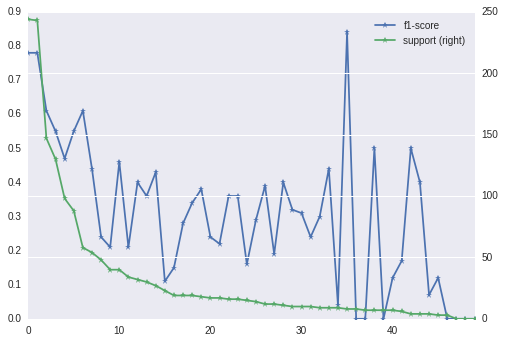

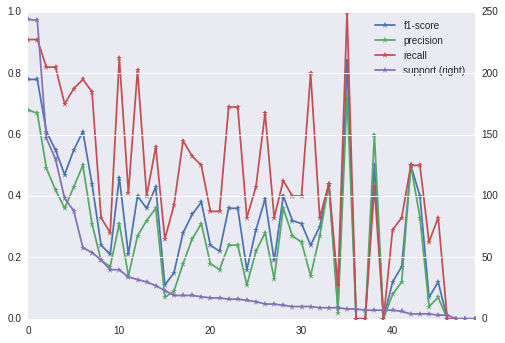

                       class_name  precision  recall  f1-score  support
35  probabilistic_graphical_model       0.73    1.00      0.84        8
0                            mooc       0.68    0.91      0.78      244
1                   video_lecture       0.67    0.91      0.78      243
6              business_analytics       0.50    0.78      0.61       58
2                machine_learning       0.49    0.82      0.61      147
3                        in_depth       0.42    0.82      0.55      130
5          probability_statistics       0.43    0.75      0.55       88
42                     regression       0.50    0.50      0.50        4
38                     clustering       0.60    0.43      0.50        7
4                        overview       0.36    0.70      0.47       98
10         reinforcement_learning       0.31    0.85      0.46       40
7           unsupervised_learning       0.31    0.74      0.44       54
33                          spark       0.44    0.44      0.44  

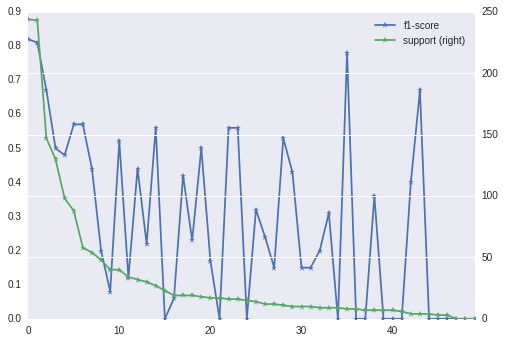

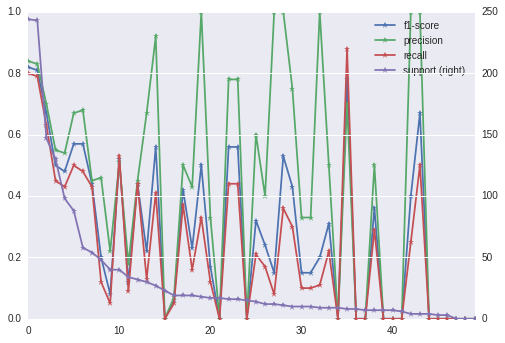

                       class_name  precision  recall  f1-score  support
0                            mooc       0.84    0.80      0.82      244
1                   video_lecture       0.83    0.79      0.81      243
35  probabilistic_graphical_model       0.70    0.88      0.78        8
2                machine_learning       0.70    0.63      0.67      147
43                           bd2k       1.00    0.50      0.67        4
5          probability_statistics       0.67    0.50      0.57       88
6              business_analytics       0.68    0.48      0.57       58
22                       genetics       0.78    0.44      0.56       16
14                       big_data       0.92    0.41      0.56       27
23                   genomic_data       0.78    0.44      0.56       16
28                 kernel_methods       1.00    0.36      0.53       11
10         reinforcement_learning       0.51    0.53      0.52       40
3                        in_depth       0.55    0.45      0.50  

In [12]:
for pred_th in [0.3, 0.5]:
    print('-' * 80)
    print('th:', pred_th)
    all_tags = sorted(set([j for i in tag_names for j in i]))
    tmp_all_y_true = list()
    tmp_all_y_pred = list()
    for y_true, y_pred, t_names in zip(all_y_true, all_y_pred, tag_names):
        tmp_y_t = np.zeros((y_true.shape[0], len(all_tags)))
        tmp_y_p = np.zeros((y_pred.shape[0], len(all_tags)))
        sorting = np.array([all_tags.index(i) for i in t_names])
        tmp_y_t[:, sorting] = y_true
        tmp_y_p[:, sorting] = y_pred > pred_th
        tmp_all_y_true.extend([np.array(i).flatten() for i in tmp_y_t])
        tmp_all_y_pred.extend([np.array(i).flatten() for i in tmp_y_p])

    #print('res shape:', all_y_true.shape)
    print(classification_report(np.array(tmp_all_y_true), np.array(tmp_all_y_pred), target_names=all_tags))
    print('hamming loss:', hamming_loss(np.array(tmp_all_y_true), np.array(tmp_all_y_pred)))
    print('LRAP:', label_ranking_average_precision_score(np.array(tmp_all_y_true), np.array(tmp_all_y_pred)))
    clf_rep_df = get_classification_report_df(np.array(tmp_all_y_true), np.array(tmp_all_y_pred), target_names=all_tags)
    clf_rep_df.sort_values(by='support', ascending=False, inplace=True)
    clf_rep_df.index = range(len(clf_rep_df))
    clf_rep_df.plot(y=['f1-score', 'support'], secondary_y=['support'], style='*-')
    plt.show()
    clf_rep_df.plot(y=['f1-score', 'precision', 'recall', 'support'], secondary_y=['support'], style='*-')
    plt.show()
    print(clf_rep_df.sort_values(by='f1-score', ascending=False))

In [19]:
print(pd.unique(df['venue']))

['Udacity' 'Coursera' 'Videolectures.net' 'edX']


In [26]:
print('# resources:', len(df))
print('tagged resources:', (df['tags'].apply(len) > 0).sum())
tag_idx = df[df['tags'].apply(len) > 0].index
all_idx = set(df.index)
test_idx = df[df['venue'] == 'Videolectures.net'].index
train_idx = all_idx - set(test_idx)

train_df = df.loc[train_idx].copy()
test_df = df.loc[test_idx].copy()

print('train tags:', train_df['tags'].apply(lambda x: 0 if x.strip() == '' else len(x.split())).sum())
print('test tags:', test_df['tags'].apply(lambda x: 0 if x.strip() == '' else len(x.split())).sum())

clf = CLF(n_topics=30, tag_vec_min_df=1, tag_vec_max_df=1., nmf=True, 
          n_neighbors=3)
clf.fit(train_df[['title', 'subtitle', 'description', 'syllabus']], 
        train_df['tags'], 
        viz=False)
y_pred_prob = clf.predict(test_df[['title', 'subtitle', 'description', 'syllabus']])
y_true = np.array(clf.vectorize_y(test_df['tags']))
print(y_pred_prob.shape, y_true.shape)

# resources: 458
tagged resources: 456
train tags: 1468
test tags: 325
tfidf shape (252, 1871)
nmf shape: (252, 30)
considered tags: (tag, resources tagged in %)
(u'mooc', 96.825396825396822, 244) ,(u'video_lecture', 96.428571428571431, 243) ,(u'in_depth', 51.587301587301596, 130) ,(u'overview', 38.888888888888893, 98) ,(u'probability_statistics', 31.349206349206348, 79) ,(u'business_analytics', 23.015873015873016, 58) ,(u'project', 19.047619047619047, 48) ,(u'data_visualization', 15.873015873015872, 40) ,(u'case_study', 13.492063492063492, 34) ,(u'machine_learning', 13.095238095238097, 33) ,(u'python', 11.111111111111111, 28) ,(u'data_collection', 9.5238095238095237, 24) ,(u'big_data', 8.3333333333333321, 21) ,(u'data_science_process', 7.5396825396825395, 19) ,(u'high_performance_computing', 7.5396825396825395, 19) ,(u'project_focused', 7.1428571428571423, 18) ,(u'data_integration', 6.746031746031746, 17) ,(u'genetics', 6.746031746031746, 17) ,(u'healthcare', 6.746031746031746, 17) ,(

                               precision    recall  f1-score   support

      artificial_intelligence       0.00      0.00      0.00         5
                         bd2k       0.00      0.00      0.00         0
                     big_data       0.75      0.50      0.60         6
                      biology       0.00      0.00      0.00         1
           business_analytics       0.00      0.00      0.00         0
                   case_study       0.00      0.00      0.00         0
               classification       0.00      0.00      0.00         0
                   clustering       0.00      0.00      0.00         4
             computer_science       0.05      0.20      0.08         5
                data_cleaning       0.00      0.00      0.00         0
              data_collection       0.00      0.00      0.00         0
             data_integration       0.00      0.00      0.00         0
         data_science_process       0.00      0.00      0.00         0
     

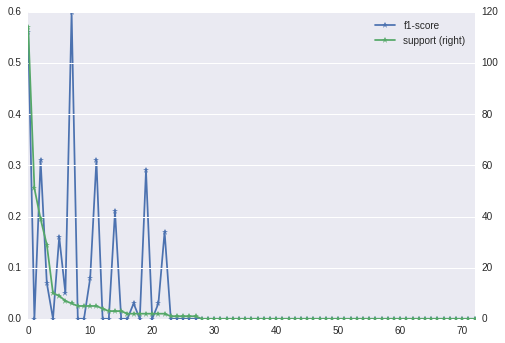

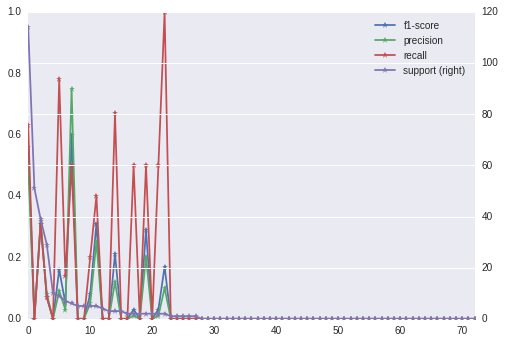

In [28]:
y_pred = y_pred_prob > 0.1
print(classification_report(y_true, y_pred, target_names=clf.get_tag_names()))
print('hamming loss:', hamming_loss(y_true, y_pred))
print('LRAP:', label_ranking_average_precision_score(y_true, y_pred))
clf_rep_df = get_classification_report_df(y_true, y_pred, target_names=clf.get_tag_names())
clf_rep_df.sort_values(by='support', ascending=False, inplace=True)
clf_rep_df.index = range(len(clf_rep_df))
clf_rep_df.plot(y=['f1-score', 'support'], secondary_y=['support'], style='*-')
plt.show()
clf_rep_df.plot(y=['f1-score', 'precision', 'recall', 'support'], secondary_y=['support'], style='*-')
plt.show()